# Multiple Linear Regression

# The Problem Statement: 
THIS DATA IS ABOUT THE AMOUNT SPENT ON ADVERTISIING THROUGH DIFFERENT CHANNELS LIKE TV , NEWSPAPER AND RADIA. 

THE GOAL IS TO PREDICT HOW MUCH EXPENSE ON EACH CHANNEL AFFECTS THE SALES AND IS THERE A WAY TO OPTIMISE THAT SALE? AND ALSO PREDICT THE SALE OF FUTURE DATA   

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab
import missingno as msno

import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [69]:
df=pd.read_csv("Advertising.csv")

In [70]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [72]:
df.shape

(200, 5)

In [73]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [74]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [75]:
df.isnull().sum()/len(df)*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

<AxesSubplot:>

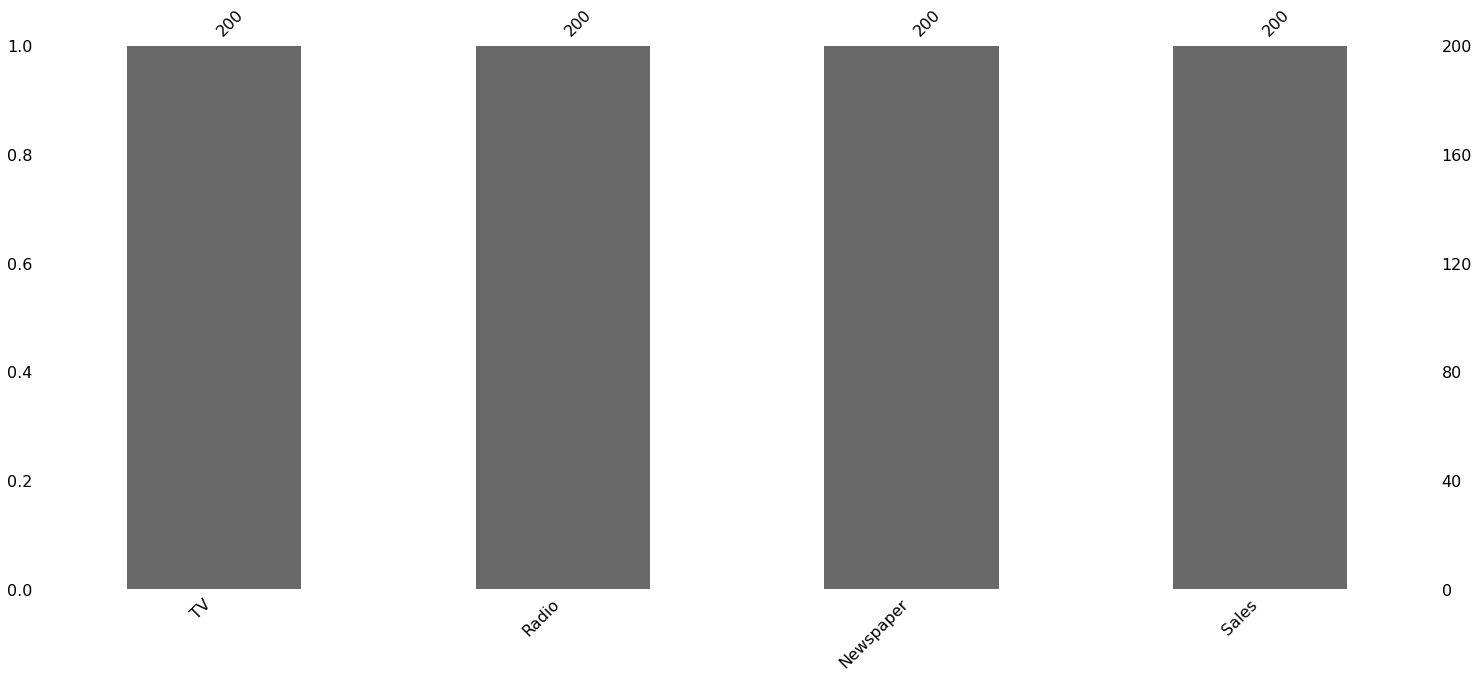

In [76]:
msno.bar(df)

In [77]:
df.duplicated().sum()/len(df)*100

0.0

In [78]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [79]:
# Checking Linearity : relation between independent feature with dependent:

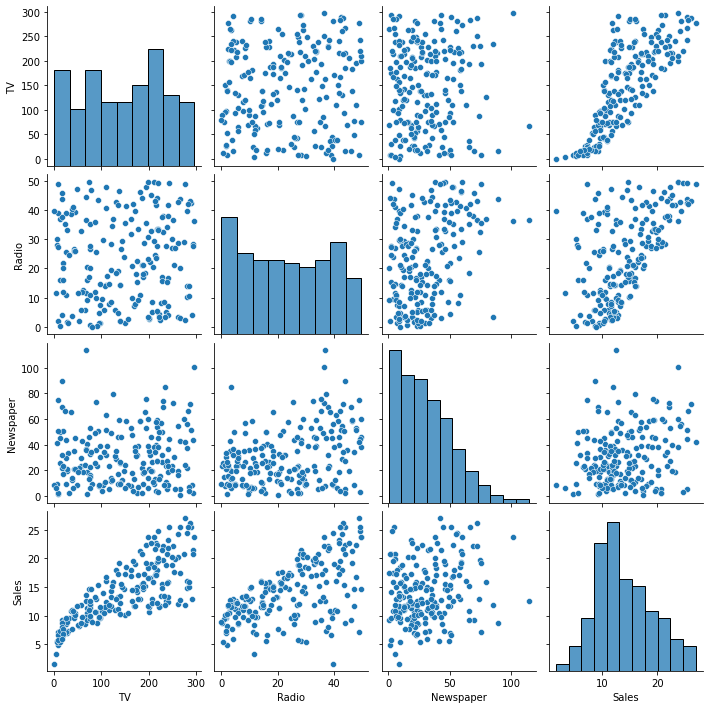

In [80]:
sns.pairplot(df)

FROM THIS OUTPLUT WE CAN SAY THAT THERE IS A SORT OF LINEAR RELATION BETWEEN TV AND SALES.

AND THEIR IS NOT MUCH LINEARITY FOUND IN RADIO WITH SALES.

THERE IS NO LINEAR RELATION BETWEEN NEWSPAPER AND SALES.M

In [81]:
# Find Correlation

<AxesSubplot:>

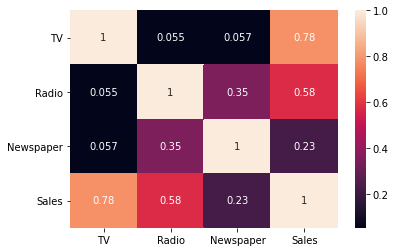

In [82]:
sns.heatmap(df.corr(),annot=True)

In [83]:
# Distruibution

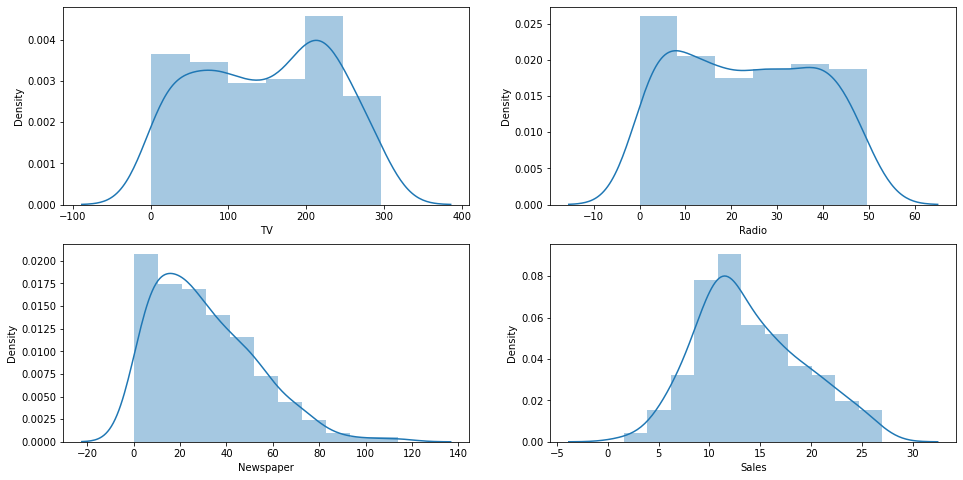

In [84]:
a=1
plt.figure(figsize=(16,8))
for i in df.columns:
    plt.subplot(2,2,a)
    sns.distplot(df[i],kde=True)
    a=a+1

In [85]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [86]:
# Checking Outliers

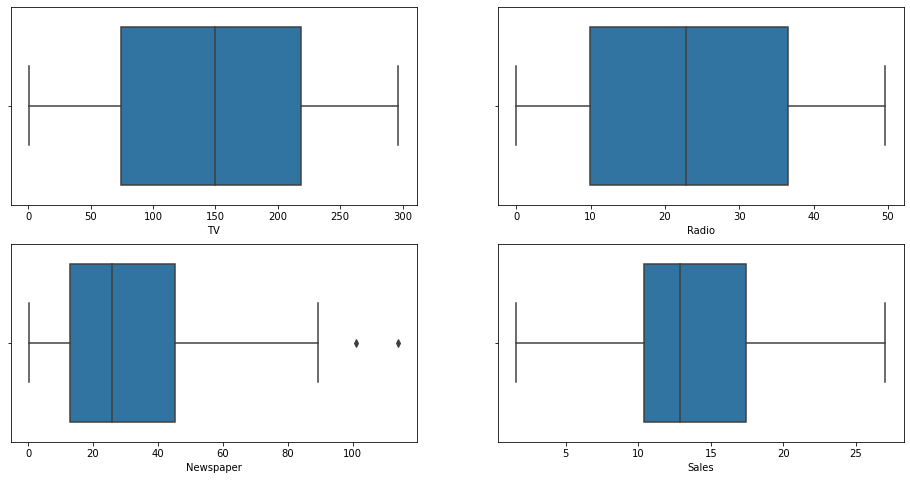

In [87]:
a=1
plt.figure(figsize=(16,8))
for i in df.columns:
    plt.subplot(2,2,a)
    sns.boxplot(df[i])
    a=a+1

In [88]:
# Segregate x and y

In [89]:
x=df.drop(columns=['Sales'])
y=df['Sales']

In [96]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [100]:
st=StandardScaler()

In [101]:
x_scaled=st.fit_transform(x)

In [102]:
# split x and y in train and test

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [104]:
Lr=LinearRegression()

In [105]:
Lr.fit(x_train,y_train)

LinearRegression()

In [117]:
Lr.intercept_

14.042004239811021

In [118]:
Lr.coef_

array([3.83060599, 2.80191171, 0.05998274])

In [135]:
# future data
# TV=100
# RADIO=50
# NEWSPAPER=40

In [133]:
a=3.83*100+2.80*50+0.05*40
a

525.0

In [106]:
y_pred=Lr.predict(x_test)

In [107]:
y_pred_train=Lr.predict(x_train)

In [108]:
r2_score(y_pred,y_test)

0.8791069137120032

In [109]:
r2_score(y_pred_train,y_train)

0.8835557925789809

In [114]:
mse=mse(y_pred,y_test)
mse

3.1740973539761064

In [111]:
mae(y_pred,y_test)

1.4607567168117601

In [116]:
rmse=np.sqrt(mse)
rmse

1.7815996615334508